In [1]:
csv_file = "C:\\Users\\Moaaz\\Desktop\\nn project test\\creditcard.csv"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from dense import Dense
from activations import Tanh, Sigmoid
from losses import mse, mse_prime
import network 
# from .network import test
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro


"""Load data set and print info about it """
df = pd.read_csv(csv_file)
print(df.info())
print(df['Class'].value_counts())
print(df.isnull().sum())


"""normalize data set"""
max_abs = df.abs().max()
df = df / max_abs
print(df)
print (df.max())
print (df.min())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:

"""Separate data into training and testing groups 60 , 40 """
Y = np.array(df['Class'])
X = np.array(df.drop('Class', axis=1))
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.4
)

Y_train = Y_train.reshape(Y_train.shape[0],1)
Y_test = Y_test.reshape(Y_test.shape[0],1)

# X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
# Y_train = Y_train.reshape(Y_train.shape[0],Y_train.shape[1],1)

print("X_train : ", X_train.shape)
print("X_test : " , X_test.shape)
print("Y_train : " , Y_train.shape)
print("Y_test : " , Y_test.shape)

X_train :  (170884, 30)
X_test :  (113923, 30)
Y_train :  (170884, 1)
Y_test :  (113923, 1)


In [4]:

#balance data set

frauds = df.query('Class == 1')
not_frauds = df.query('Class == 0')

frauds['Class'].value_counts() ,not_frauds['Class'].value_counts()

balanced_df = pd.concat([frauds,not_frauds.sample(len(frauds),random_state=1)])
balanced_df = balanced_df.sample(frac=1,random_state=1)
X_b = balanced_df.drop('Class',axis=1)
y_b = balanced_df['Class']
print(y_b)

X_train, X_test, Y_train, Y_test = train_test_split(X_b,y_b,test_size=0.4)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print("y_train value : \n", Y_train.value_counts())
print("y_test value : \n", Y_test.value_counts())

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)

Y_train = Y_train.reshape(Y_train.shape[0],1)
Y_test = Y_test.reshape(Y_test.shape[0],1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)



189959    0.0
107637    1.0
275992    1.0
120862    0.0
207960    0.0
         ... 
236229    0.0
15810     1.0
1569      0.0
107067    1.0
9509      1.0
Name: Class, Length: 984, dtype: float64
(590, 30)
(590,)
(394, 30)
(394,)
y_train value : 
 Class
0.0    305
1.0    285
Name: count, dtype: int64
y_test value : 
 Class
1.0    207
0.0    187
Name: count, dtype: int64
(590, 30)
(590, 1)
(394, 30)
(394, 1)


In [9]:
#init network






X=X_train
Y=Y_train

zeros = (Y == 0).sum()
ones = (Y == 1).sum()

print (zeros, ones)
nn = [
    Dense(30, 48),
    Sigmoid(),
    Dense(48, 24),
    Sigmoid(),
    Dense(24, 1),
    Sigmoid()
]


305 285


In [12]:
#train
network.train(network=nn,loss= mse,loss_prime= mse_prime,x_train= X,y_train=  Y, epochs=400, learning_rate=0.5, w0= 1, w1=zeros/ones,algorithm= "RProp", verbose=1 )

1/400, error=8.357474527074184e-05
min = 0.0430758993617712
max = 0.9903909031545977
acc = 0.9491525423728814
 tn: 305   tp: 255   fn: 30   fp: 0 
2/400, error=6.321235333332696e-05
min = 0.017139780936059428
max = 0.9971492707859032
acc = 0.9559322033898305
 tn: 303   tp: 261   fn: 24   fp: 2 
3/400, error=0.0008703783220911303
min = 0.9850751411172459
max = 0.9998346545656536
acc = 0.4830508474576271
 tn: 0   tp: 285   fn: 0   fp: 305 
4/400, error=0.0004954063252263573
min = 0.11777236878944405
max = 0.9994875674061003
acc = 0.5847457627118644
 tn: 60   tp: 285   fn: 0   fp: 245 
5/400, error=0.0002908061244341348
min = 0.0001624599877127991
max = 0.977936182854142
acc = 0.8152542372881356
 tn: 305   tp: 176   fn: 109   fp: 0 
6/400, error=8.350599604937741e-05
min = 0.0006424170812175999
max = 0.9973713204089055
acc = 0.9491525423728814
 tn: 305   tp: 255   fn: 30   fp: 0 
7/400, error=0.0008548185978096227
min = 0.6706047400219562
max = 0.9998918493772427
acc = 0.4830508474576271


In [13]:
network.test_my_model(nn, mse, mse_prime, X_test, Y_test)

 error=0.0024414467163117767
min = 0.00014695028392284183
max = 0.9998050649178204
acc = 0.916243654822335
 tn: 178   tp: 183   fn: 24   fp: 9 


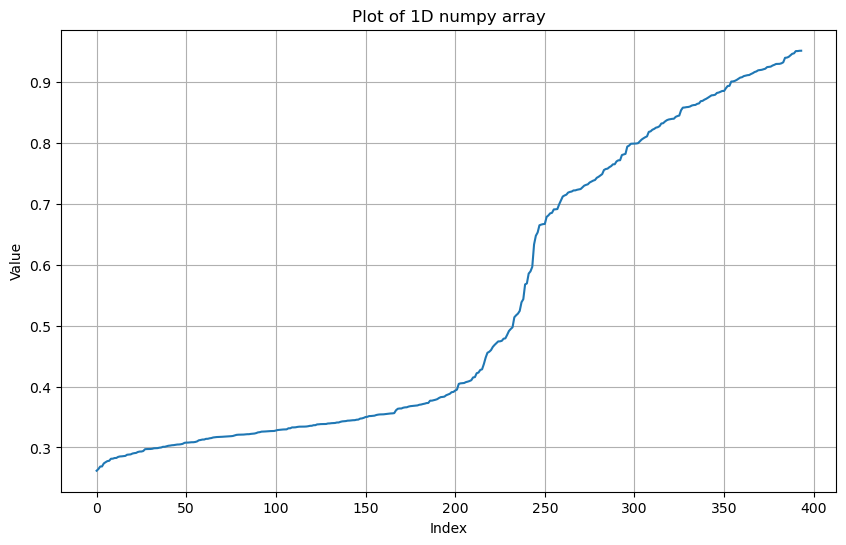

In [ ]:
arr = np.array(out).flatten()
arr.sort()
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.title('Plot of 1D numpy array')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()
